This notebook creates a stock price prediction model using TensorFlow and LSTM networks in RNN. We will start by importing some libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

We will load the dataset through Pandas, delimiting with ",". We will also not consider any malformed lines.

In [4]:
data = pd.read_csv("data/all_stocks_5yr.csv", delimiter=",", on_bad_lines="skip")
print(data.shape)
print(data.sample(7))

(619040, 7)
              date      open      high       low     close   volume Name
339898  2013-05-07   41.3333   41.5294   40.7157   41.3725  2156348  LEN
522801  2015-12-30   37.0000   37.9400   37.0000   37.1800  2704088  STX
237426  2013-07-22  105.8600  106.2500  105.0500  105.9000   389409  FRT
96484   2015-09-22   82.1800   82.1800   80.4400   81.5000  2445006  CAH
326293  2014-04-25  109.0600  109.5000  108.7700  109.2400  1832151  KMB
553265  2013-06-17   26.7500   27.3200   26.6200   27.0900  2608282  TXT
174965  2017-03-16   79.4300   79.7900   78.5331   79.3400  1418423  DOV


In [5]:
data.info() # Check date feature type

<class 'pandas.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  str    
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 33.1 MB


We can see that date is an object. It's best to convert it to DateTime.

In [6]:
data['date'] = pd.to_datetime(data['date'])
data.info() # Now it's fixed

<class 'pandas.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[us]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  str           
dtypes: datetime64[us](1), float64(4), int64(1), str(1)
memory usage: 33.1 MB


Nice! So now we can visualize the data of some famous companies (we will do so by implementing the Exploratory Data Analysis technique). Let's first look at a few of them.

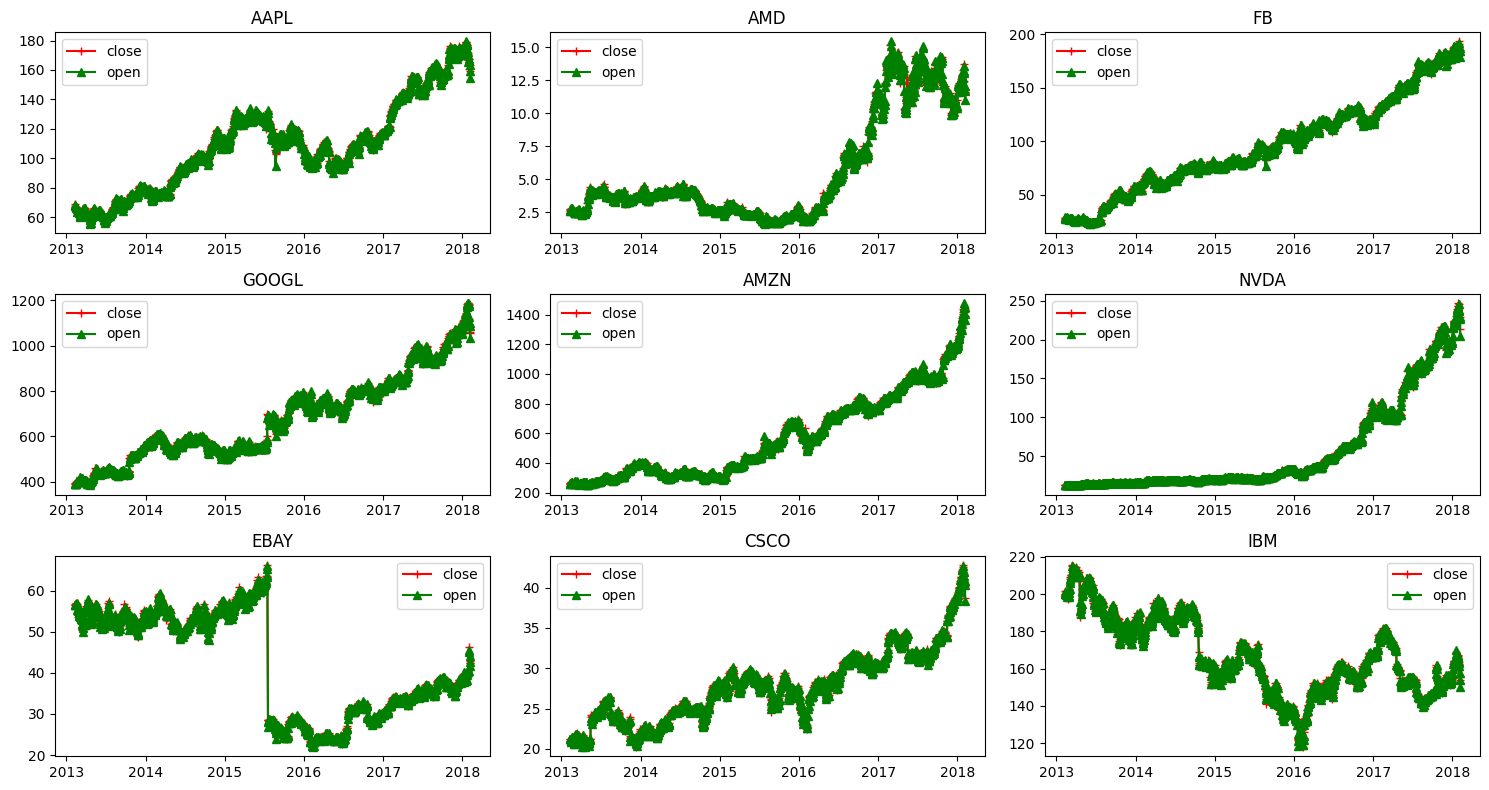

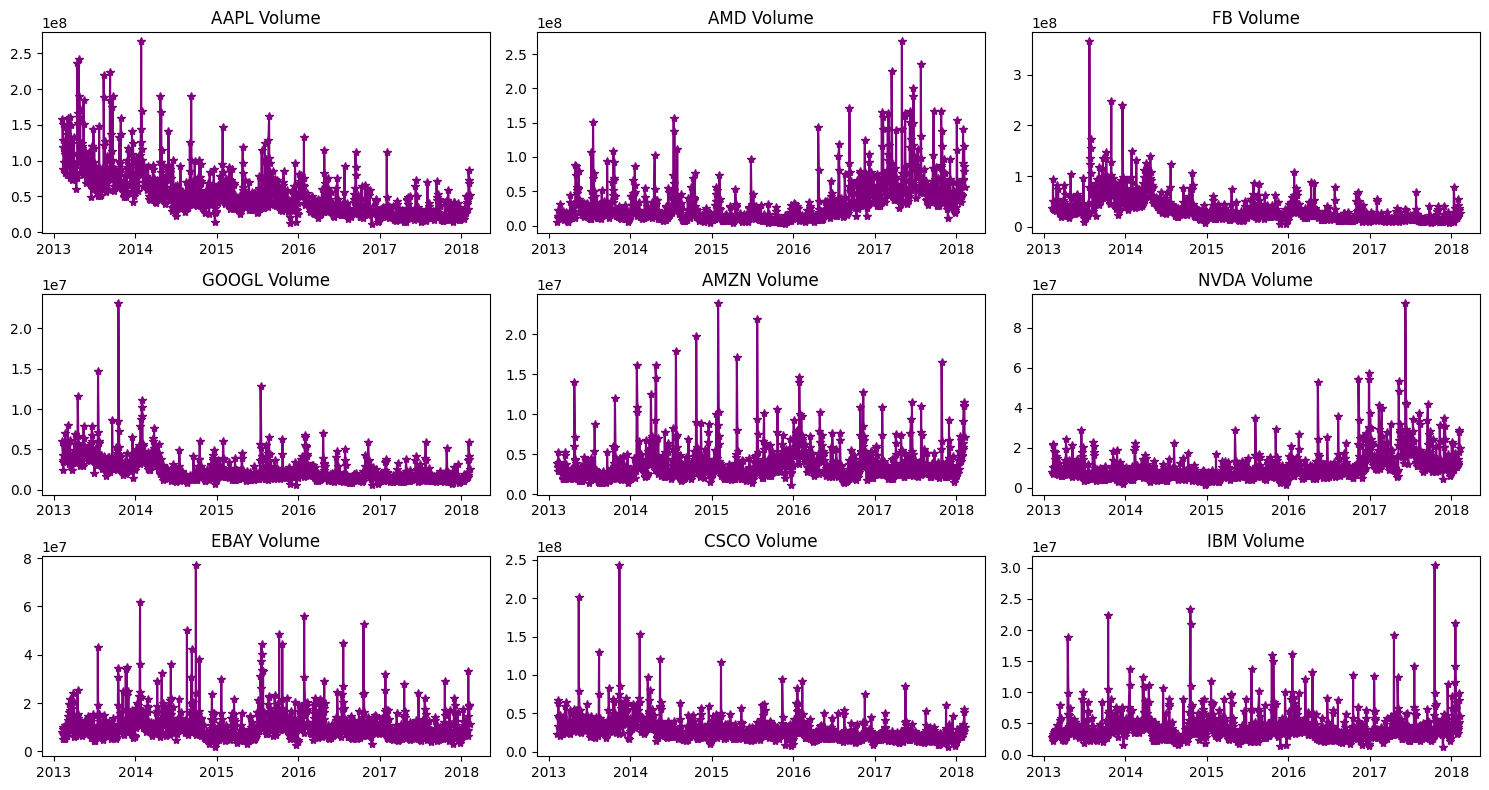

In [ ]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
# Distribution of open and closed stocks over 5 years
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

# Volume of trade for these stocks
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

Now, let's take a look at Apple's Stocks from 2013 to 2018.

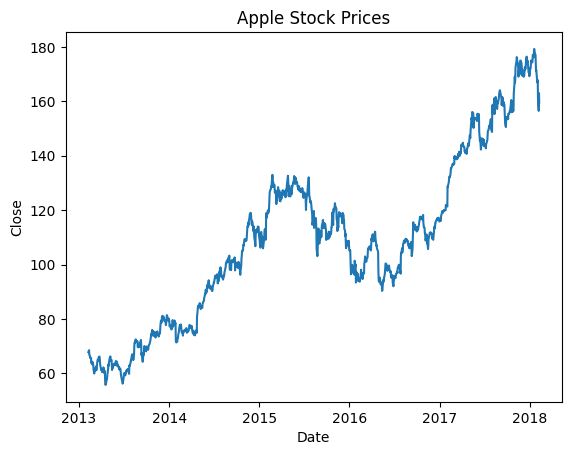

In [9]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013, 1, 1))]
plt.plot(apple['date'], apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

We can now pick a part of the whole data to be the training data, so that the remaining is the validation data.

In [10]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * 0.95))
print(training)

1197
